# Computation time

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def read_timings(filename):
    with open(filename, "r") as f:
        lines = []
        for line in f.readlines():
            line = line.strip().split(", ")
            lines.append([int(line[1]), float(line[0])])

        lines = np.asarray(lines)
    return lines
    
timings_main = read_timings("timings_main.txt")
timings_tracker = read_timings("timings_tracker.txt")

def find_statistics(data, min_nr_of_objects=1, max_nr_of_objects=5):
    length = max_nr_of_objects - min_nr_of_objects + 1
    objects = np.zeros(length, dtype=np.int)
    tries = np.zeros(length)
    means = np.zeros(length)
    stds = np.zeros(length)
    
    nr_of_obj = min_nr_of_objects
    for i in range(length):
        timings = data[np.equal(nr_of_obj, data[:, 0])]

        mean = np.mean(timings)
        std = np.std(timings)

        objects[i] = nr_of_obj
        tries[i] = len(timings)
        means[i] = mean
        stds[i] = std
        
        nr_of_obj += 1
        
    return objects, tries, means, stds

[2.00843964 2.9344743  3.72728928 4.46128253 5.2532357 ] [1.18765999 1.25087848 1.31359258 1.05416662 1.1003799 ]
[1.05766729 1.8868176  2.48614712 3.06819544 3.49816227] [0.22515154 0.36906302 0.65002845 1.00337316 1.54528678]
[3.06610693 4.8212919  6.2134364  7.52947797 8.75139797] [1.20881325 1.30418729 1.46562698 1.45534359 1.89703641]


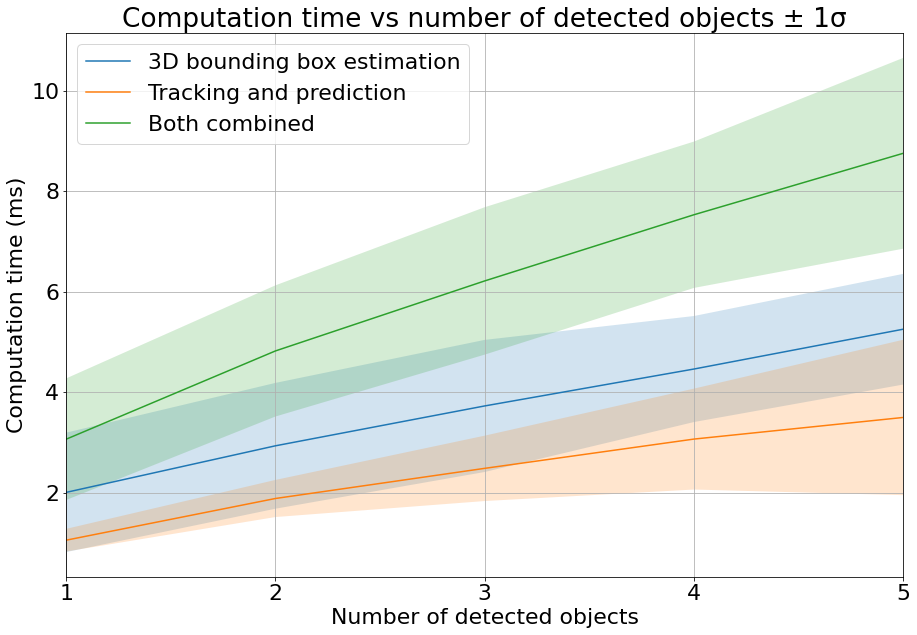

In [9]:
plt.rcParams.update({"font.size": 22})

fig, ax = plt.subplots(1, 1, figsize=(15,10))

main_objects, main_tries, main_means, main_stds = find_statistics(timings_main)
tracker_objects, tracker_tries, tracker_means, tracker_stds = find_statistics(timings_tracker)

total_objects = main_objects
total_tries = main_tries
total_means = main_means + tracker_means
total_stds = np.sqrt(main_stds ** 2 + tracker_stds ** 2)

print(main_means, main_stds)
print(tracker_means, tracker_stds)
print(total_means, total_stds)

ax.set_title("Computation time vs number of detected objects ± 1σ")
ax.set_xlabel("Number of detected objects")
ax.set_ylabel("Computation time (ms)")
ax.set_xticks(main_objects)
ax.plot(main_objects, main_means, label="3D bounding box estimation")
ax.plot(tracker_objects, tracker_means, label="Tracking and prediction")
ax.plot(total_objects, total_means, label="Both combined")
# ax.errorbar(main_objects, main_means, yerr=main_stds, label="3D conversion")
# ax.errorbar(tracker_objects, tracker_means, yerr=tracker_stds, label="Tracking and prediction")
# ax.errorbar(main_objects, main_means + tracker_means, yerr=main_stds + tracker_stds, label="Combined")
ax.fill_between(main_objects, main_means - main_stds, main_means + main_stds, alpha=0.2)
ax.fill_between(tracker_objects, tracker_means - tracker_stds, tracker_means + tracker_stds, alpha=0.2)
ax.fill_between(total_objects, total_means - total_stds, total_means + total_stds, alpha=0.2)
ax.legend(loc="upper left")
ax.grid()
ax.set_xlim(1, 5)
#ax_set_x


plt.show()